In [4]:
import numpy as np
import pandas as pd

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [91]:
ingredients = [i for i in range(300)]

In [146]:
data = []

In [147]:
for i in range(100):
    data.append({"id": i,
                "likes": np.unique(np.random.randint(0, len(ingredients), size=10)),
                "dislikes": np.unique(np.random.randint(0, len(ingredients), size=10))})

In [148]:
df = pd.DataFrame(data)

In [149]:
df

,id,likes,dislikes
0,0,"[18, 48, 125, 147, 149, 206, 220, 231, 249, 250]","[66, 68, 82, 118, 161, 169, 250, 273, 278, 289]"
1,1,"[12, 75, 121, 131, 141, 147, 193, 215, 235, 244]","[7, 18, 52, 99, 123, 140, 159, 186, 253, 281]"
2,2,"[52, 54, 69, 81, 105, 172, 247, 260, 269, 291]","[36, 109, 111, 116, 166, 197, 274, 275, 276, 278]"
3,3,"[44, 47, 90, 96, 129, 134, 143, 187, 216, 259]","[4, 9, 61, 114, 121, 160, 219, 229, 266, 292]"
4,4,"[17, 22, 43, 84, 189, 198, 201, 249, 281, 286]","[61, 95, 112, 131, 157, 158, 210, 217, 246, 264]"
...,...,...,...
95,95,"[28, 74, 102, 134, 135, 155, 191, 224, 237, 261]","[75, 105, 126, 162, 210, 227, 241, 273, 274, 299]"
96,96,"[0, 36, 58, 108, 122, 138, 149, 193, 196, 271]","[6, 10, 46, 47, 61, 80, 97, 107, 209, 233]"
97,97,"[0, 1, 14, 80, 82, 99, 116, 214, 243, 280]","[66, 116, 118, 124, 161, 252, 259, 276, 278, 285]"
98,98,"[2, 21, 69, 146, 167, 212, 224, 252, 267, 296]","[32, 47, 81, 171, 176, 212, 242, 271, 284, 294]"


In [150]:
#!pip install matplotlib

In [169]:
x = df["likes"].explode()
x

0      18
0      48
0     125
0     147
0     149
     ... 
99    167
99    222
99    238
99    244
99    271
Name: likes, Length: 984, dtype: object

In [154]:
len(x)

984

### The lengths for x and y need to match

In [170]:
y = df["dislikes"].explode()
y

0      66
0      68
0      82
0     118
0     161
     ... 
99    193
99    197
99    229
99    248
99    282
Name: dislikes, Length: 993, dtype: object

In [160]:
len(y[:len(x)])

984

In [133]:
df

,id,likes,dislikes
0,0,"[5, 32, 90, 91, 117, 130, 136, 150, 247, 297]","[52, 108, 129, 169, 171, 209, 220, 224, 237, 284]"
1,1,"[47, 69, 97, 144, 147, 205, 225, 263, 264, 274]","[83, 98, 133, 138, 152, 159, 167, 283, 289]"
2,2,"[1, 13, 82, 142, 154, 155, 177, 201, 229, 245]","[17, 32, 57, 65, 67, 150, 202, 241, 242, 288]"
3,3,"[0, 26, 49, 78, 84, 137, 186, 193, 221, 289]","[2, 20, 31, 39, 57, 90, 92, 103, 211, 291]"
4,4,"[9, 39, 71, 154, 164, 167, 174, 178, 179, 268]","[18, 23, 76, 125, 161, 182, 203, 227, 246, 277]"
...,...,...,...
95,95,"[4, 8, 79, 89, 135, 195, 220, 262, 273, 294]","[57, 63, 76, 104, 151, 181, 191, 265, 273]"
96,96,"[8, 52, 60, 99, 117, 146, 199, 231, 260, 282]","[12, 75, 125, 130, 158, 162, 171, 207, 225, 276]"
97,97,"[21, 47, 61, 68, 71, 90, 117, 183, 221]","[63, 72, 93, 106, 108, 109, 205, 276, 280, 290]"
98,98,"[8, 75, 78, 92, 115, 124, 155, 188, 247, 289]","[60, 108, 144, 168, 174, 193, 206, 248, 275, 288]"


In [171]:
# the lengths of x and y must match.
data = list(zip(x, y[:len(x)]))

In [172]:
data

[(18, 66),
 (48, 68),
 (125, 82),
 (147, 118),
 (149, 161),
 (206, 169),
 (220, 250),
 (231, 273),
 (249, 278),
 (250, 289),
 (12, 7),
 (75, 18),
 (121, 52),
 (131, 99),
 (141, 123),
 (147, 140),
 (193, 159),
 (215, 186),
 (235, 253),
 (244, 281),
 (52, 36),
 (54, 109),
 (69, 111),
 (81, 116),
 (105, 166),
 (172, 197),
 (247, 274),
 (260, 275),
 (269, 276),
 (291, 278),
 (44, 4),
 (47, 9),
 (90, 61),
 (96, 114),
 (129, 121),
 (134, 160),
 (143, 219),
 (187, 229),
 (216, 266),
 (259, 292),
 (17, 61),
 (22, 95),
 (43, 112),
 (84, 131),
 (189, 157),
 (198, 158),
 (201, 210),
 (249, 217),
 (281, 246),
 (286, 264),
 (24, 8),
 (63, 9),
 (99, 11),
 (170, 14),
 (201, 54),
 (224, 98),
 (227, 148),
 (251, 151),
 (255, 173),
 (268, 298),
 (16, 9),
 (69, 48),
 (143, 78),
 (155, 102),
 (162, 129),
 (195, 153),
 (214, 178),
 (215, 181),
 (280, 259),
 (283, 265),
 (8, 33),
 (24, 79),
 (97, 93),
 (101, 118),
 (138, 146),
 (141, 196),
 (185, 228),
 (219, 262),
 (239, 267),
 (284, 298),
 (53, 4),
 (106,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


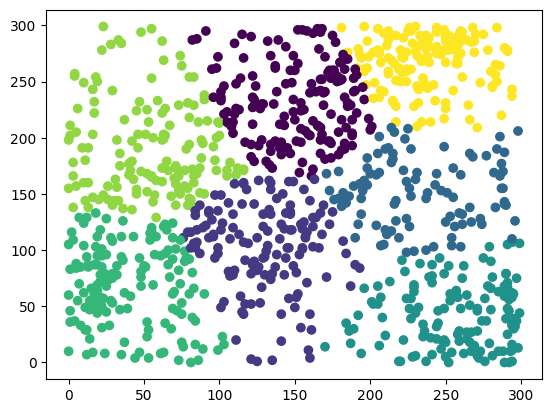

In [176]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)

plt.scatter(x, y[:len(x)], c=kmeans.labels_)
plt.show()

In [ ]:
### PCA
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

In [168]:
#from sklearn.decomposition import PCA
#reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
#kmeans.fit(reduced_data)

KMeans(n_clusters=3, n_init=4)